# Importing Libraries and DATA 

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns
from pandas_profiling import ProfileReport

In [3]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Checking the Data For Missing Values

In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
df = df[df['date_added'].notna()]

### Creating Another Dataframe to Avoid Loss of Valuable Data | Still Providing Useful Analysis

##### Creating a Copy of the Same Dataframe df1 is the one with missing values, where as df has been created as cleansed copy with missing values entirely removed

In [6]:
df1 = df

##### Extracting Year & Monthly Values When the Content Was Added on Netflix

In [7]:
df1['year_added'] = df1['date_added'].apply(lambda x: x.split(" ")[-1])
df1['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [8]:
df.shape

(7777, 13)

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2379
cast             718
country          506
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
year_added         0
dtype: int64

In [10]:
df = df[df['cast'].notna()]
df = df[df['director'].notna()]

In [11]:
df.shape

(4979, 13)

In [12]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

## Cleansing the DATA

In [14]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

1    2016
2    2018
3    2017
4    2020
5    2017
Name: year_added, dtype: object

In [15]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

1    December
2    December
3    November
4     January
5        July
Name: month_added, dtype: object

In [16]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

1           Mexico
2        Singapore
3    United States
4    United States
5           Turkey
Name: principal_country, dtype: object

# Exploratory Data Analysis

Creating a rating replacement System would help in understanding what specific type of content in movies and TV shows has been made available on Netflix for viewer Consumption

In [17]:
df1['Count']=1
df_titles=df1.groupby('type')['Count'].sum().reset_index()

In [18]:
fig1=px.pie(df_titles,values='Count',names='type',hole=0.4)
fig1.update_layout(title='Type of title',title_x=0.5)
fig1.update_traces(textfont_size=15,textinfo='percent+label')
fig1.show()

### Specific Target Audience for the Content 

In [19]:
t_df = df[[ 'release_year', 'rating']]
t_df = t_df.value_counts().to_frame()
t_df.reset_index(level =  [0,1], inplace = True)
t_df = t_df.rename(columns = {0:'count'})
rating = pd.DataFrame([],columns = ('release_year', 'rating', 'count'))
for rating_element in df['rating'].unique():
    rating = pd.concat([rating, t_df[t_df['rating'] == rating_element].iloc[:1,:]])
rating

,release_year,rating,count
0,2018,TV-MA,320
11,2016,R,79
30,2016,PG-13,31
5,2018,TV-14,154
56,2020,TV-G,17
13,2017,TV-PG,65
62,2016,NR,15
35,2018,PG,30
174,2004,G,3
82,2017,TV-Y7,12


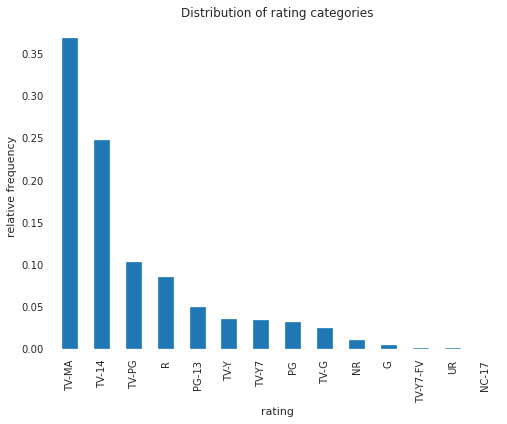

In [20]:
plt.figure(figsize=(8,6))
df1['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

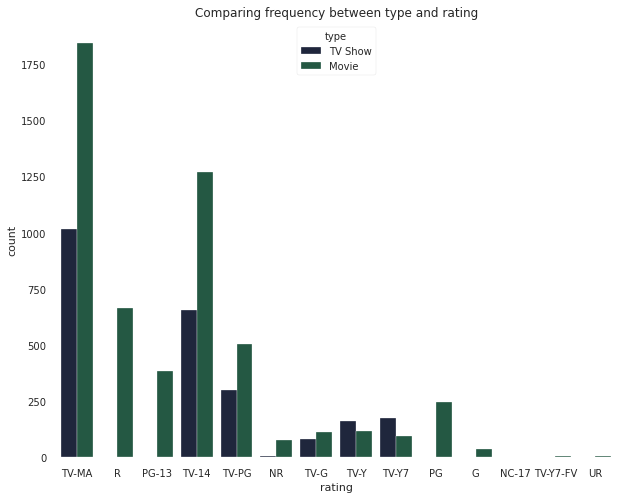

In [58]:
plt.figure(figsize=(10,8))
#sns.color_palette("mako", as_cmap=True)
cpal = sns.color_palette("cubehelix")
sns.countplot(x='rating',hue='type',data=df1, palette = cpal)
plt.title('Comparing frequency between type and rating')
plt.show()

### Content Production Countries

In [22]:
country_df = df['country']
country_df = country_df.value_counts().to_frame()
country_df

,country
United States,1823
India,832
United Kingdom,174
Canada,104
Egypt,87
...,...
"South Africa, Germany, Netherlands, France",1
"United Kingdom, Germany, Canada",1
"Germany, Sri Lanka",1
"United States, Brazil",1


Since there are entries at end of countries such as united states, we need them separated. Hence in order to achieve that, we'd have to use the following code

In [23]:
from collections import Counter
country_df = df['country']
country_counting = pd.Series(dict(Counter(','.join(country_df).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
#country_counting.drop(['NULL'], axis=0, inplace=True)

In [24]:
top15_country = country_counting[:15]
top15_country

United States     2351
India              891
United Kingdom     426
Canada             263
France             254
Spain              147
Germany            143
Japan              108
China               98
Hong Kong           95
Egypt               95
Mexico              91
Turkey              83
Australia           76
Philippines         76
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top 15 Content Production Countries')

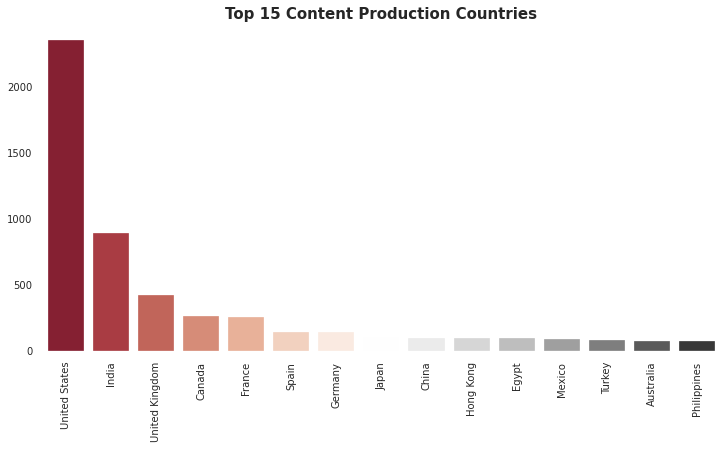

In [25]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top15_country.index, top15_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top15_country.index, rotation='90')
ax.set_title('Top 15 Content Production Countries', fontsize=15, fontweight='bold')

### Has Netflix been adding more TV content

In [26]:
df1['Count']=1
df1_year_add=df1.groupby('year_added')['Count'].sum().reset_index()
#df1_year_add

df1_tv_cont=df1[df1['type']=='TV Show']
df1_mov_cont=df1[df1['type']=='Movie']

df1_tv_cont_years=df1_tv_cont.groupby('year_added')['Count'].sum().reset_index()
df1_mov_cont_years=df1_mov_cont.groupby('year_added')['Count'].sum().reset_index()

fig5=px.line(df1_year_add ,x='year_added',y='Count',labels={'year_added':'Year of Content Inclusion','Count':'Amount of content released'})
fig5.update_traces(name='Total content',showlegend=True)
fig5.add_scatter(name='TV shows',x=df1_tv_cont_years['year_added'], y=df1_tv_cont_years['Count'], mode='lines')
fig5.add_scatter(name='Movies',x=df1_mov_cont_years['year_added'], y=df1_mov_cont_years['Count'], mode='lines')
fig5.update_layout(title='Number of Addition each year',title_x=0.5,template='plotly_white')

In [27]:
df['Count']=1
df_year_add=df.groupby('release_year')['Count'].sum().reset_index()
#df_year_add
df_tv_cont=df[df['type']=='TV Show']
df_mov_cont=df[df['type']=='Movie']

df_tv_cont_years=df_tv_cont.groupby('release_year')['Count'].sum().reset_index()
df_mov_cont_years=df_mov_cont.groupby('release_year')['Count'].sum().reset_index()

fig5=px.line(df_year_add ,x='release_year',y='Count',labels={'release_year':'Year of release','Count':'Amount of content released'})
fig5.update_traces(name='Total content',showlegend=True)
fig5.add_scatter(name='TV shows',x=df_tv_cont_years['release_year'], y=df_tv_cont_years['Count'], mode='lines')
fig5.add_scatter(name='Movies',x=df_mov_cont_years['release_year'], y=df_mov_cont_years['Count'], mode='lines')
fig5.update_layout(title='Number of releases each year',title_x=0.5,template='plotly_white')

In [72]:
t_df = df1[['type','release_year']][df1['country'] == 'United States']
t_df = t_df.value_counts().to_frame()
t_df.reset_index(level=[0,1], inplace =True)
t_df = t_df.rename(columns = {0:'count'})
t_df

,type,release_year,count
0,Movie,2017,279
1,Movie,2018,238
2,Movie,2019,210
3,Movie,2016,202
4,TV Show,2020,172
...,...,...,...
95,TV Show,1998,1
96,TV Show,1996,1
97,TV Show,1995,1
98,TV Show,1968,1


### Categories of Specific Content Being Produced More

In [30]:
col = "listed_in"
categories = ", ".join(df1_mov['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]


In [31]:
col = "listed_in"
categories = ", ".join(df1_mov['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#13ea20"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

### Most Frequently Represented Categories

In [79]:
t_df = list()
clean_df1 = df1.dropna()
clean_df1.reset_index(inplace=True)
for ind, element in clean_df1.iterrows():
    type_show = element['release_year']
    for cast in str(element['listed_in']).split(','):
        t_df.append([type_show, cast])
category_df1 = pd.DataFrame(t_df, columns= ['release_year', 'category'])
category_df1

,release_year,category
0,2016,Dramas
1,2016,International Movies
2,2011,Horror Movies
3,2011,International Movies
4,2009,Action & Adventure
...,...,...
10681,2005,Dramas
10682,2005,International Movies
10683,2015,Dramas
10684,2015,International Movies


In [84]:
category_df1.head(17)

,release_year,category
0,2016,Dramas
1,2016,International Movies
2,2011,Horror Movies
3,2011,International Movies
4,2009,Action & Adventure
5,2009,Independent Movies
6,2009,Sci-Fi & Fantasy
7,2008,Dramas
8,2016,International TV Shows
9,2016,TV Dramas


In [80]:
category = category_df1.value_counts().to_frame()
category.reset_index(level=[0,1], inplace=True)
category = category.rename(columns = {0:'count'})


years = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]
year_df1 = list()
for year in years:
    temp1 = category[category['release_year'] == year].iloc[0,:]
    temp2 = category[category['release_year'] == year].iloc[1,:]
    year_df1.append(list(temp1))
    year_df1.append(list(temp2))
    
year = pd.DataFrame(year_df1, columns=('years', 'genre', 'count'))

Text(0.5, 1.0, 'Top Two Genre in last 10 years')

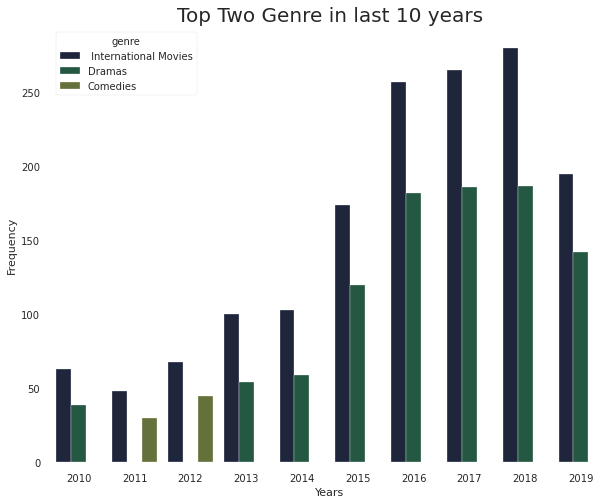

In [83]:
bar, ax = plt.subplots(figsize=(10,8))
cpal = sns.color_palette("cubehelix")
sns.barplot(x = 'years', y ='count', hue='genre', data = year, palette = cpal)
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Top Two Genre in last 10 years', size=20)